In [2]:
import time 
time.sleep(6000)

In [3]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [4]:
prompt16 = "Simulate Trypsin (1TRN) for 1ns at 300K and compute SASA."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-11
time: 01:56:19
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [5]:
agent.run(prompt16)

Thought: To simulate Trypsin (PDB ID: 1TRN) for 1 nanosecond (ns) at 300 Kelvin (K) and compute the Solvent Accessible Surface Area (SASA), I will first need to set up and run the molecular dynamics simulation. After the simulation, I will compute the SASA for the resulting trajectory.

Action: 
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1TRN",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      

2024-07-11 01:56:26.769 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To simulate Trypsin (PDB ID: 1TRN) for 1 nanosecond (ns) at 300 Kelvin (K) and compute the Solvent Accessible Surface Area (SASA), I will first need to download the PDB file for Trypsin. After downloading, I will set up and run the molecular dynamics simulation. Finally, I will compute the SASA for the resulting trajectory.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1TRN"
  }
}
```PDB file found with this ID: 1TRN
Now that the PDB file for Trypsin (1TRN) has been successfully downloaded, I will proceed to set up and run the molecular dynamics simulation for 1 nanosecond (ns) at 300 Kelvin (K). After the simulation, I will compute the Solvent Accessible Surface Area (SASA) for the resulting trajectory.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1TRN_015629",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "

('Final Answer: The molecular dynamics simulation for Trypsin (PDB ID: 1TRN) was successfully completed for 1 nanosecond at 300 Kelvin. The Solvent Accessible Surface Area (SASA) for the resulting trajectory was computed and saved. The SASA values are stored with File ID `sasa_Trypsin`, and the corresponding plot is saved with plot ID `fig0_102741`.',
 '2MQ490OF')

In [6]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-11
time: 10:27:49
Files found in registry: 1TRN_015629: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_015629
 1TRN_015641: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_015645: Initial positions for simulation sim0_015645
 sim0_015645: Basic Simulation of Protein 1TRN_015641
 rec0_015653: Simulation trajectory for protein 1TRN_015641 and simulation sim0_015645
 rec1_015653: Simulation state log for protein 1TRN_015641 and simulation sim0_015645
 rec2_015653: Simulation pdb frames for protein 1TRN_015641 and simulation sim0_015645
 sasa_Trypsin: Total SASA values for Trypsin
 fig0_102741: Plot of SASA over time for Trypsin


In [7]:
traj_path_1 = registry.get_mapped_path("rec0_015653") 
top_path_1 = registry.get_mapped_path("top_sim0_015645")

fig_path = registry.get_mapped_path("fig0_102741")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(fig_path)



Number of frames:  100


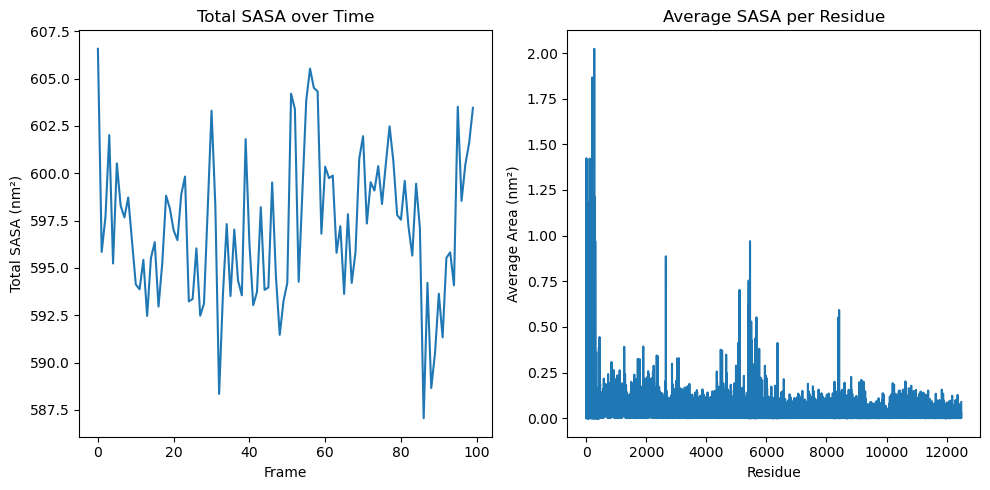

In [8]:
import mdtraj as md
import numpy as np
from IPython.display import display, Image
#print number of frames adn residues:
traj = md.load(traj_path_1, top=top_path_1)

print("Number of frames: ", traj.n_frames)
Image(filename=fig_path)


# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅